In [166]:
# Supervised Learning: Iris Classification
import torch
from sklearn.datasets import load_iris
import numpy as np
# Load iris dataset
iris = load_iris()


In [167]:
# Shuffle dataset
indexer = np.random.permutation(len(iris['data']))
iris['data'] = iris['data'][indexer]
iris['target'] = iris['target'][indexer]
# Split dataset into train and test

# 120 samples for training, 30 samples for testing
iris_train = torch.Tensor(iris['data'][:120]).to(torch.float)
iris_train_target = torch.Tensor(iris['target'][:120]).to(torch.float)

iris_test = torch.Tensor(iris['data'][120:]).to(torch.float)
iris_test_target = torch.Tensor(iris['target'][120:]).to(torch.float)
# Convert to one-hot encoding, (unit vectors)
iris_train_target = torch.nn.functional.one_hot(iris_train_target.to(torch.int64), num_classes=3).to(torch.float)
iris_test_target = torch.nn.functional.one_hot(iris_test_target.to(torch.int64), num_classes=3).to(torch.float)

In [168]:
# Define hyperparameters, can be tuned (hyperparameter tuning)
num_epochs = 10000
learning_rate = 0.05


In [169]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        # 3 Layers, 4 input neurons, 3 hidden neurons, 1 output neuron
        self.linear = torch.nn.Linear(4, 4) # Multiplies by 4x4 weight matrix
        # Non-linear activation function
        self.non_linear = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(4, 3) # Multiplies by 4x3 weight matrix
        self.output = torch.nn.Softmax(dim=1) # Gives probability distribution 
        # More weights (more model complexity) the more it overfits the training data
        
    def forward(self, x):
        x = self.linear(x)
        x = self.non_linear(x)
        x = self.linear2(x)
        x = self.output(x)
        return x

Epoch: 0 | Loss: 1.1248490810394287
Epoch: 1 | Loss: 1.1218624114990234
Epoch: 2 | Loss: 1.1189464330673218
Epoch: 3 | Loss: 1.116114854812622
Epoch: 4 | Loss: 1.113311529159546
Epoch: 5 | Loss: 1.1104551553726196
Epoch: 6 | Loss: 1.1075862646102905
Epoch: 7 | Loss: 1.1047507524490356
Epoch: 8 | Loss: 1.1019268035888672
Epoch: 9 | Loss: 1.099181890487671
Epoch: 10 | Loss: 1.0965310335159302
Epoch: 11 | Loss: 1.093987226486206
Epoch: 12 | Loss: 1.0915799140930176
Epoch: 13 | Loss: 1.0892930030822754
Epoch: 14 | Loss: 1.0871046781539917
Epoch: 15 | Loss: 1.0850013494491577
Epoch: 16 | Loss: 1.0829474925994873
Epoch: 17 | Loss: 1.0809361934661865
Epoch: 18 | Loss: 1.0789680480957031
Epoch: 19 | Loss: 1.0770288705825806
Epoch: 20 | Loss: 1.0751194953918457
Epoch: 21 | Loss: 1.0732245445251465
Epoch: 22 | Loss: 1.0713390111923218
Epoch: 23 | Loss: 1.0694606304168701
Epoch: 24 | Loss: 1.0675841569900513
Epoch: 25 | Loss: 1.0657061338424683
Epoch: 26 | Loss: 1.0638154745101929
Epoch: 27 | Los

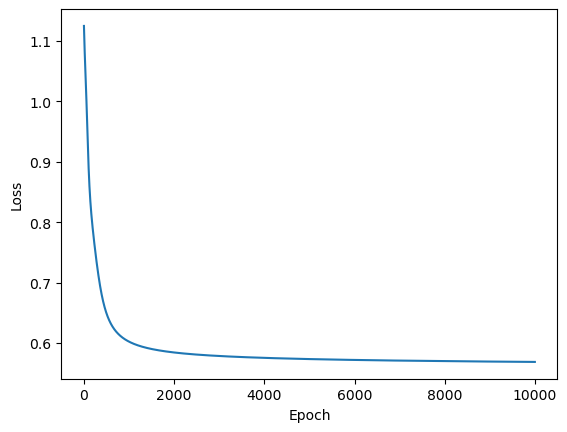

In [170]:
model = Model()
# Loss function, categorical cross entropy (gets distance between two probability distributions)
loss_fn = torch.nn.CrossEntropyLoss()
# Define optimizer, stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

losses = []

for epoch in range(num_epochs):
    y_pred = model(iris_train)
    loss = loss_fn(y_pred, iris_train_target)
    print(f'Epoch: {epoch} | Loss: {loss.item()}')
    losses.append(loss.item())
    # Calculates gradients of the parameters, adds to the gradients
    loss.backward()
    # Updates the parameters
    optimizer.step()
    # Zeroes the gradients before next epoch
    optimizer.zero_grad()

# Plot loss
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



In [171]:
# Test model
with torch.no_grad():
    y_pred = model(iris_test)
    loss = loss_fn(y_pred, iris_test_target)
    print(f'Loss: {loss.item()}')
    print(f'Predicted: {y_pred.argmax(1)}')
    print(f'Target: {iris_test_target.argmax(1)}')



# Bad model because overfitting to training data

Loss: 0.5897025465965271
Predicted: tensor([2, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1,
        1, 1, 1, 0, 0, 1])
Target: tensor([2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1,
        1, 1, 1, 0, 0, 1])


In [172]:
with torch.no_grad():
    y_pred = model(iris_train)
    loss = loss_fn(y_pred, iris_train_target)
    print(f'Loss: {loss.item()}')
    print(f'Predicted: {y_pred.argmax(1)}')
    print(f'Target: {iris_train_target.argmax(1)}')

Loss: 0.5687147974967957
Predicted: tensor([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0,
        0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2,
        2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0,
        2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2])
Target: tensor([0, 1, 0, 2, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0,
        0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2,
        2, 2, 0, 1, 0, 0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0,
        2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 2, 0, 1, 0, 2, 2])
